## <b><span style='color:#F1C40F'>|</span> Отримання вмісту веб-сторінки</b>

In [13]:
import requests

url = "https://www.francetvinfo.fr/monde/usa/presidentielle/presidentielle-americaine-2024-immigration-economie-democratie-a-quoi-ressemblerait-un-deuxieme-mandat-de-donald-trump-a-la-maison-blanche_6843854.html"
response = requests.get(url)
print(response.text[:100])




<!DOCTYPE html>
<html lang="fr" class="is-mobile no-js">
<head>
        <title>Pr&eacute;sidentie


## <b><span style='color:#F1C40F'>|</span> Парсинг HTML</b>

In [14]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'html.parser')

# Знайти всі теги <p> та витягти текст
paragraphs = soup.find_all('p')
text = "\n".join(p.get_text() for p in paragraphs)
print(text[:1000])

Recevez l'essentiel de l'actualité et restez à jour avec nos newsletters



      Tout comprendre à la présidentielle américaine
    
Un deuxième mandat semblable au premier ? Donald Trump espère s'installer de nouveau à la Maison Blanche à l'issue de l'élection présidentielle américaine qui aura lieu mardi 5 novembre. Le républicain et son adversaire démocrate, la vice-présidente Kamala Harris, sont au coude-à-coude dans les sondages. Immigration, économie, climat, relations internationales... Donald Trump a publié sur son site de campagne une série de vidéos détaillant certains de ses projets pour l'Amérique. Les autres mesures qu'il envisage, souvent évoquées en interview ou en meeting – et qui manquent régulièrement de précision –, ont été recensées par plusieurs médias américains.
Avant que les électeurs ne départagent les candidats dans les urnes, franceinfo fait le point sur le programme défendu par Donald Trump.
L'économie arrive en tête des préoccupations des Américains à l'ap

## <b><span style='color:#F1C40F'>|</span> Фільтрація речень</b>

In [15]:
# Відбираємо лише речення де більше 3 слів
# також ті де фрази не починаються на à regarder', 'min' бо вони не несуть корисної інформації
france_text = [
    phrase.strip() for phrase in text.split('\n')
    if len(phrase.split()) >= 3 and not phrase.strip().lower().startswith(('à regarder', 'min'))
]
france_text

["Recevez l'essentiel de l'actualité et restez à jour avec nos newsletters",
 'Tout comprendre à la présidentielle américaine',
 "Un deuxième mandat semblable au premier\xa0? Donald Trump espère s'installer de nouveau à la Maison Blanche à l'issue de l'élection présidentielle américaine qui aura lieu mardi 5 novembre. Le républicain et son adversaire démocrate, la vice-présidente Kamala Harris, sont au coude-à-coude dans les sondages. Immigration, économie, climat, relations internationales... Donald Trump a publié sur son site de campagne une série de vidéos détaillant certains de ses projets pour l'Amérique. Les autres mesures qu'il envisage, souvent évoquées en interview ou en meeting – et qui manquent régulièrement de précision –, ont été recensées par plusieurs médias américains.",
 'Avant que les électeurs ne départagent les candidats dans les urnes, franceinfo fait le point sur le programme défendu par Donald Trump.',
 "L'économie arrive en tête des préoccupations des Américains

## <b><span style='color:#F1C40F'>|</span> Переклад із французького тексту на українську мову</b>

In [16]:
from deep_translator import GoogleTranslator

ukr_text = []

for sentence in france_text:
    text = GoogleTranslator(source='fr', target='uk').translate(sentence)


    print("Французький текст:", sentence)
    print("Переклад на українську:", text, "\n\n")
    ukr_text.append(text)

Французький текст: Recevez l'essentiel de l'actualité et restez à jour avec nos newsletters
Переклад на українську: Отримуйте важливі новини та будьте в курсі наших інформаційних бюлетенів 


Французький текст: Tout comprendre à la présidentielle américaine
Переклад на українську: Розуміння всього про американські президентські вибори 


Французький текст: Un deuxième mandat semblable au premier ? Donald Trump espère s'installer de nouveau à la Maison Blanche à l'issue de l'élection présidentielle américaine qui aura lieu mardi 5 novembre. Le républicain et son adversaire démocrate, la vice-présidente Kamala Harris, sont au coude-à-coude dans les sondages. Immigration, économie, climat, relations internationales... Donald Trump a publié sur son site de campagne une série de vidéos détaillant certains de ses projets pour l'Amérique. Les autres mesures qu'il envisage, souvent évoquées en interview ou en meeting – et qui manquent régulièrement de précision –, ont été recensées par plusieu

## <b><span style='color:#F1C40F'>|</span> Виводимо: </b>
1. Слова більше 15-х букв
2. Слова з великої літери
3. Слова, що закінчуються на 'о'
4. Слова, що починаються на 'с'

In [17]:
# Розбиваємо текст на слова
splitted_text = ' '.join(ukr_text).split()

# Фільтруємо слова
specific_words = [word for word in splitted_text if len(word) > 15]
capital_words = [word for word in splitted_text if word.istitle()]
words_end_with_o = [word for word in splitted_text if word.endswith("о")]
words_start_with_w = [word for word in splitted_text if word.startswith("с")]

# Виводимо результати
print("Слова більше 16-х букв:", specific_words)
print("Слова з великої літери:", capital_words)
print("Слова, що закінчуються на 'o':", words_end_with_o)
print("Слова, що починаються на 'с':", words_start_with_w)

Слова більше 16-х букв: ['віце-президентка', 'Джорджтаунського', 'відповідальність»,', 'електрообладнання', 'застосовуватимуться»,']
Слова з великої літери: ['Отримуйте', 'Розуміння', 'Другий', 'Дональд', 'Трамп', 'Білий', 'Республіканець', 'Демократичної', 'Камала', 'Гарріс,', 'Імміграція,', 'Дональд', 'Трамп', 'Америки.', 'Кілька', 'Перш', 'Дональд', 'Трамп.', 'Згідно', 'Gallup,', 'Щоб', 'Дональд', 'Трамп', 'New', 'York', 'Times.', 'Він', 'Щоб', 'Time.', 'На', 'Дональд', 'Трамп', 'Але', 'Китаї', 'Washington', 'Post.', '«Це', 'Ганс', 'Ноель,', 'Джорджтаунського', 'На', 'Associated', 'Press,', 'Дональд', 'Трамп', 'У', 'У', 'Бюро', 'Міністерства', '«Важко', 'Ханс', 'Ноель.', 'Дональд', 'Трамп', 'Для', 'Дональд', 'Трамп', 'Мексикою', 'Трампа', 'Він', 'Today.', 'Він', 'Газа,', 'Time.', 'Цю', 'У', 'Дональд', 'Трамп', 'Камала', 'Гарріс.', 'Республіканець', 'У', 'Однак', 'Дональд', 'Трамп', 'Призначення', 'Верховного', 'Сполучених', 'Штатах', 'Ганс', 'Ноель.', '«Він', 'Але', 'Дональд', 'Трам

## <b><span style='color:#F1C40F'>|</span> Знаходимо унікальні слова: </b>

In [20]:
import re

def get_unique_words(text_array):
    # Об'єднуємо всі речення в один текст
    text = ' '.join(text_array)
    # Видаляємо пунктуацію та розділяємо на слова
    words = re.findall(r'\b[а-яА-ЯіІєЄїЇ]+\b', text.lower())
    # Повертаємо унікальні слова
    return set(words)

# Виклик функції
unique_words = get_unique_words(ukr_text)
list(unique_words)[:50]

['вважає',
 'проекту',
 'угоди',
 'податки',
 'описує',
 'компаній',
 'якби',
 'громада',
 'завгодно',
 'росії',
 'пропустіть',
 'попереджає',
 'термін',
 'посиливши',
 'жахливу',
 'кандидатів',
 'відбудуться',
 'міжнародні',
 'веб',
 'гарріса',
 'скоро',
 'державних',
 'увійдіть',
 'вважаючи',
 'супермен',
 'на',
 'виділений',
 'повернувся',
 'ці',
 'голосувати',
 'голосування',
 'посад',
 'згадати',
 'про',
 'точності',
 'змінити',
 'камали',
 'плани',
 'краще',
 'вирішуватимуть',
 'роки',
 'бар',
 'доступу',
 'коли',
 'захисту',
 'статті',
 'імміграція',
 'в',
 'кордоні',
 'браузера']

## <b><span style='color:#F1C40F'>|</span> Візуалізація хмари слів: </b>

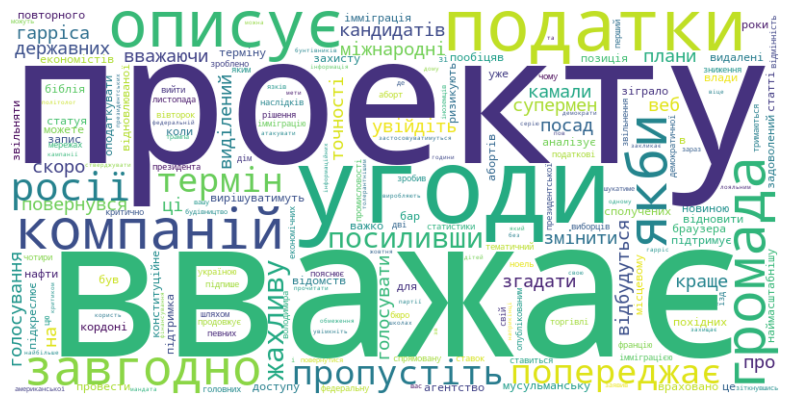

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


unique_words_string = ' '.join(unique_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unique_words_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## <b><span style='color:#F1C40F'>|</span> Візуалізація мережі слів: </b>

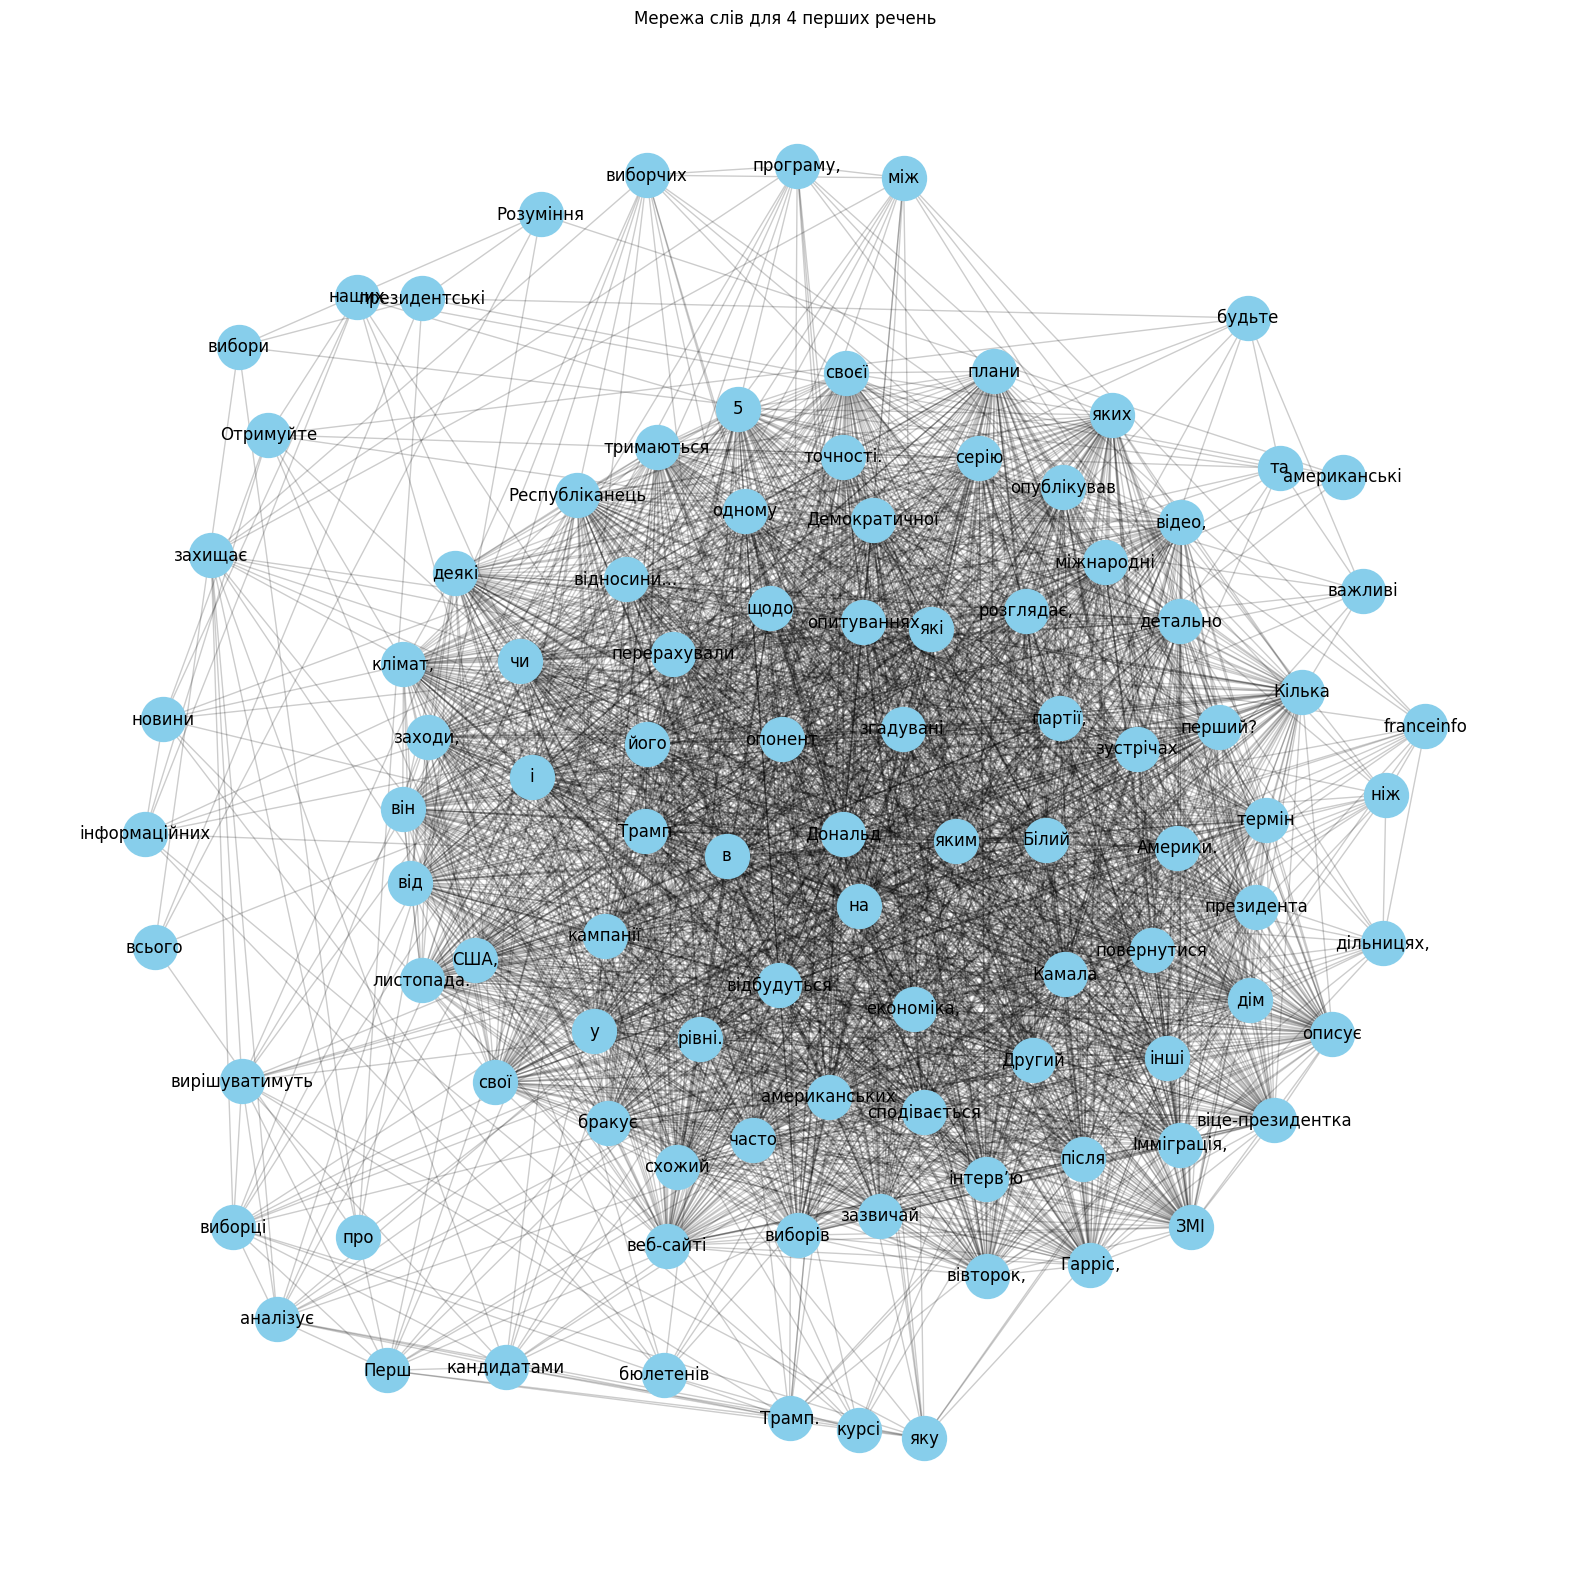

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

n = 4
# Створення графа
G = nx.Graph()

# Зберігаємо кількість появ слів у спільних реченнях
word_pairs = defaultdict(int)

# Збираємо пари слів з речень
for text in ukr_text[:n]:
    words = text.split()
    for i in range(len(words)):
        for j in range(i + 1, len(words)):
            word_pairs[(words[i], words[j])] += 1

# Додаємо вузли та ребра до графа
for (word1, word2), weight in word_pairs.items():
    G.add_edge(word1, word2, weight=weight)

# Візуалізація мережі слів
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=2.5)  # Значне збільшення k для ще більшої відстані між вузлами
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos)

plt.title(f"Мережа слів для {n} перших речень")
plt.axis('off')
plt.show()

## <b><span style='color:#F1C40F'>|</span> Аналіз частоти вживання слів, але перед тим чистимо від сполучників: </b>

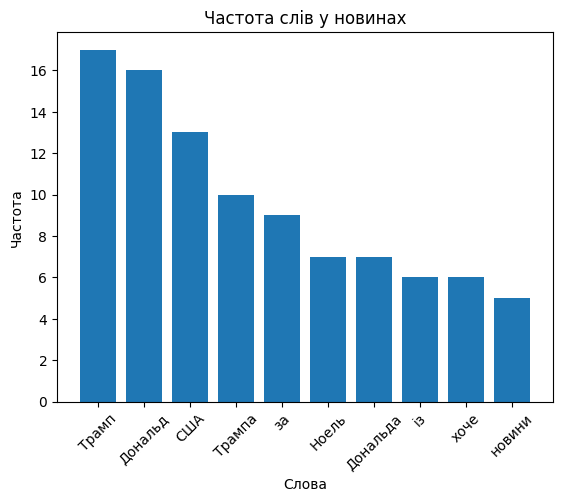

In [9]:
from collections import Counter
import nltk

stop_words = set([
    'в', 'і', 'не', 'на', 'до', 'з', 'для', 'та', 'що', 'як', 'у', 'які',
    'він', 'також', 'його', 'є', 'вона', 'мене', 'ти', 'ми', 'свої', 'ці',
    'це', 'но', 'однак', 'якщо', 'або', 'як', 'під', 'по', 'коли', 'де',
    'с', 'всередині', 'всередині', 'чого', 'саме', 'знову', 'після',
    'декілька', 'раз', 'разом', 'вже'
])

def analyze_text(news):
    # Токенізація
    tokens = nltk.word_tokenize(' '.join(news))

    # Фільтрація токенів (видаляємо стоп-слова та розділові знаки)
    filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]

    # Підрахунок частоти слів
    word_counts = Counter(filtered_tokens)  # Це тепер Counter з відфільтрованими словами
    return word_counts

# Візуалізація
def plot_word_counts(word_counts):
    most_common = word_counts.most_common(10)  # Це повинно працювати, якщо word_counts - Counter
    words, counts = zip(*most_common)

    plt.bar(words, counts)
    plt.xlabel('Слова')
    plt.ylabel('Частота')
    plt.title('Частота слів у новинах')
    plt.xticks(rotation=45)  # Повертаємо підписи для кращого вигляду
    plt.show()

word_counts = analyze_text(ukr_text)
plot_word_counts(word_counts)